
# 🐍 Day 2 — NYC High School Directory Exploration

**Objective:** Clean the data, explore/answer questions, visualize, and summarize insights.

> Dataset path : `daily_tasks/day_2/day_2_datasets/high_school_directory.csv`


## 1) Setup

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)
print("Pandas:", pd.__version__)


Pandas: 2.3.2


## 2) Load the dataset

In [23]:
import pandas as pd
import re

csv_path = "daily_tasks/day_2/day_2_datasets/high-school-directory.csv"
df = pd.read_csv(csv_path)
df.head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,"Q113, Q22",A to Beach 25th St-Wavecrest,8-21 Bay 25 Street,Far Rockaway,NY,11691,http://schools.nyc.gov/schoolportals/27/Q260,412.0,Far Rockaway Educational Campus,NaN,Frederick Douglass Academy (FDA) VI High Schoo...,"Advisory, Graphic Arts Design, Teaching Intern...",Spanish,"Calculus AB, English Language and Composition,...","Biology, Physics B","French, Spanish","After-school Program, Book, Writing, Homework ...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,"Step Team, Modern Dance, Hip Hop Dance",NaN,"Jamaica Hospital Medical Center, Peninsula Hos...","York College, Brooklyn College, St. John's Col...",NaN,"Queens District Attorney, Sports and Arts Foun...","Replications, Inc.",Citibank,New York Road Runners Foundation (NYRRF),"Uniform Required: plain white collared shirt, ...","Extended Day Program, Student Summer Orientati...",7:45 AM,2:05 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to Queens students or residents who a...,Then to New York City residents who attend an ...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.601989336', 'longitude': '-73...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - ...,2630 Benson Avenue,Brooklyn,NY,11214,http://schools.nyc.gov/schoolportals/21/K559,260.0,Lafayette Educational Campus,NaN,At Life Academy High School for Film and Music...,"College Now, iLEARN courses, Art and Film Prod...",Spanish,NaN,"Biology, English Literature and Composition, E...",NaN,"Film, Music, Talent Show, Holiday Concert, Stu...","Basketball, Bowling, Indoor Track, Soccer, Sof...","Basketball, Bowling, Indoor Track, Soccer, Sof...",Cricket,NaN,Coney Island Generation Gap,NaN,"City Tech, Kingsborough Early College Secondar...","Museum of the Moving Image, New York Public Li...",Institute for Student Achievement,"Film Life, Inc., SONY Wonder Tech",NaN,NaN,Our school requires completion of a Common Cor...,NaN,8:15 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to New York City residents who attend...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.593593811', 'longitude': '-73...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35


# - Clean the column names

In [24]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)
df.columns[:20]


Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min',
       'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type'],
      dtype='object')

## 3) Filter: only schools located in **Brooklyn**

In [25]:
brooklyn = df[df["borough"].str.strip().str.lower() == "brooklyn"].copy()
print(brooklyn.shape)
brooklyn.head(2)


(121, 69)


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,location_1,community_board,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - ...,2630 Benson Avenue,Brooklyn,NY,11214,http://schools.nyc.gov/schoolportals/21/K559,260.0,Lafayette Educational Campus,NaN,At Life Academy High School for Film and Music...,"College Now, iLEARN courses, Art and Film Prod...",Spanish,NaN,"Biology, English Literature and Composition, E...",NaN,"Film, Music, Talent Show, Holiday Concert, Stu...","Basketball, Bowling, Indoor Track, Soccer, Sof...","Basketball, Bowling, Indoor Track, Soccer, Sof...",Cricket,NaN,Coney Island Generation Gap,NaN,"City Tech, Kingsborough Early College Secondar...","Museum of the Moving Image, New York Public Li...",Institute for Student Achievement,"Film Life, Inc., SONY Wonder Tech",NaN,NaN,Our school requires completion of a Common Cor...,NaN,8:15 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to New York City residents who attend...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.593593811', 'longitude': '-73...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,"B15, B38, B46, B47, B52, B54, Q24","J to Kosciusko St ; M, Z to Myrtle Ave",1014 Lafayette Avenue,Brooklyn,NY,11221,http://schools.nyc.gov/schoolportals/16/K393,155.0,NaN,NaN,The Frederick Douglass Academy IV (FDA IV) Sec...,"College Now with Medgar Evers College, Fresh P...","French, Spanish","English Language and Composition, United State...",French Language and Culture,NaN,"After-school and Saturday Programs, Art Studio...",NaN,NaN,NaN,Basketball Team,Achieving Change in our Neighborhood (Teen ACT...,NaN,Medgar Evers College,Noel Pointer School of Music,"Hip-Hop 4 Life, Urban Arts, and St. Nicks Alli...",NaN,NaN,NaN,"Dress Code Required: solid white shirt/blouse,...","Student Summer Orientation, Weekend Program of...",8:00 AM,2:20 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to continuing 8th graders,Then to Brooklyn students or residents who att...,Then to New York City residents who attend an ...,Then to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.692133704', 'longitude': '-73...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52


## 4) Questions & Answers

### - How many total **unique** schools are in Brooklyn? (use school identifier)

In [28]:
brooklyn_unique_schools = brooklyn[school_id_col].nunique()
print("Unique schools in Brooklyn:", brooklyn_unique_schools)


Unique schools in Brooklyn: 121


### - How many Brooklyn schools offer **Grade 9** entry?

In [29]:

grade9_mask = (brooklyn["grade_span_min"] <= 9) & (brooklyn["grade_span_max"] >= 9)
brooklyn_grade9_count = brooklyn.loc[grade9_mask, school_id_col].nunique()
print("Brooklyn schools offering Grade 9:", brooklyn_grade9_count)


Brooklyn schools offering Grade 9: 121


In [30]:
# Sanity check: list any Brooklyn schools that don't include Grade 9 (should be empty)
no_g9 = brooklyn.loc[~((brooklyn["grade_span_min"] <= 9) & (brooklyn["grade_span_max"] >= 9)),
                     [school_id_col, "grade_span_min", "grade_span_max"]]
no_g9

,dbn,grade_span_min,grade_span_max


All Brooklyn schools in the high school directory include Grade 9; Brooklyn has 121 unique high schools.

### 5) Group & summarize

### - Count of schools per borough (again unique schools)

In [33]:

bor_col = "borough" if "borough" in df.columns else "boro"
school_id_col = "dbn" if "dbn" in df.columns else "school_id"

schools_per_borough = (
    df.groupby(df[bor_col].astype(str).str.strip().str.upper())[school_id_col]
      .nunique()
      .sort_values(ascending=False)
)
print(schools_per_borough)

borough
BROOKLYN         121
BRONX            118
MANHATTAN        106
QUEENS            80
STATEN ISLAND     10
Name: dbn, dtype: int64


### - Average number of students per borough

In [ ]:
# Pick the students column your file actually has
enroll_col = "total_students"  
df[enroll_col] = pd.to_numeric(df[enroll_col], errors="coerce")

avg_enrollment = df.groupby(bor_col)[enroll_col].mean().round(1).reset_index()
avg_enrollment

,borough,total_students
0,Bronx,490.4
1,Brooklyn,699.1
2,Manhattan,589.8
3,Queens,1046.6
4,Staten Island,1847.5


### - Summary of grade_span_max grouped by borough (use the method that provides you with basic statistics about that column)

In [39]:
df["grade_span_max"] = pd.to_numeric(df["grade_span_max"], errors="coerce")

grade_span_summary = (
    df.groupby(bor_col)["grade_span_max"]
      .describe()
      .reset_index()
)
grade_span_summary

,borough,count,mean,std,min,25%,50%,75%,max
0,Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
1,Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
2,Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
3,Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
4,Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


## 6) Visualization — Bar chart: Number of schools per borough

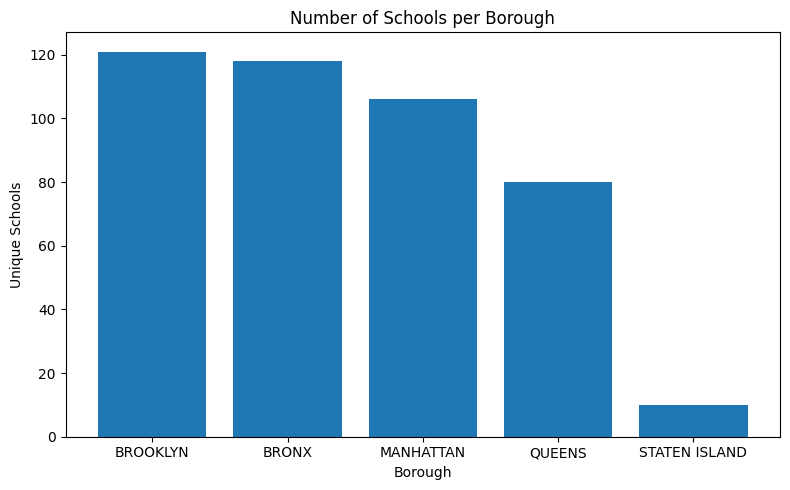

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(schools_per_borough.index.astype(str), schools_per_borough.values)
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Unique Schools")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## 7) Key Insights (2–3 bullets)
- Concentration: Most high schools are in Brooklyn, Bronx, and Manhattan (≈79% combined), with Staten Island having the fewest.

- Brooklyn Enrollments: All Brooklyn schools include Grade 9, consistent with a high-school directory focus.

- Operational insight: Boroughs with larger average enrollments (Staten Island, Queens) likely have fewer but larger campuses; Bronx appears to have many smaller schools
